## This is a model trained to predict heart disease based on medical data of patients

### Import all the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load dataset

In [3]:
heart = pd.read_csv('heart_statlog.csv')

### Data inspection

In [4]:
heart.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [5]:
heart.tail()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [6]:
heart.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [8]:
print(heart.shape)

(1190, 12)


### Upon data inspection, there are no categorical columns (this indicates the dataset has been pre-encoded)

## Handling missing values

In [10]:
missing_values = heart.isnull().sum()
print(missing_values)

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
ST_slope               0
target                 0
dtype: int64


#### There are no missing values in the dataset

## Handling Outliers

### Z-Score to treat the outliers

In [11]:
for column in heart.select_dtypes(include = ['int64' , 'float64']).columns:
    z_scores = (heart[column] - heart[column].mean())/ heart[column].std()
    outliers = heart[np.abs(z_scores)>3]

In [12]:
# Function to impute outliers
def impute_outliers(heart_, method='median'):
    for column in heart.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate Z-scores
        z_scores = (heart[column] - heart[column].mean()) / heart[column].std()
        # Identify outliers (Z-score > 3 or Z-score < -3)
        outliers = np.abs(z_scores) > 3
        # Calculate replacement value (mean or median)
        if method == 'mean':
            replacement_value = heart[column].mean()
        elif method == 'median':
            replacement_value = heart[column].median()
        else:
            raise ValueError("Method must be 'mean' or 'median'")
        # Impute outliers with the replacement value
        heart.loc[outliers, column] = replacement_value
    return heart
heart_imputed = impute_outliers(heart.copy(), method='median')
heart = heart_imputed
print(heart)

      age  sex  chest_pain_type  resting_bp_s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting_blood_sugar  resting_ecg  max_heart_rate  exercise_angina  \
0                       0            0           172.0                0   
1                       0            0           156.0                0   
2                       0     

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3070724706.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '140.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  heart.loc[outliers, column] = replacement_value


### Using capping and flooring to handle outliers

In [13]:
for column in heart.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = heart[column].quantile(0.25)
    Q3 = heart[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    heart[column] = np.where(heart[column] > upper_bound, upper_bound, heart[column])
    heart[column] = np.where(heart[column] < lower_bound, lower_bound, heart[column])

### Visualization

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3451460308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heart, x='target', palette='viridis')


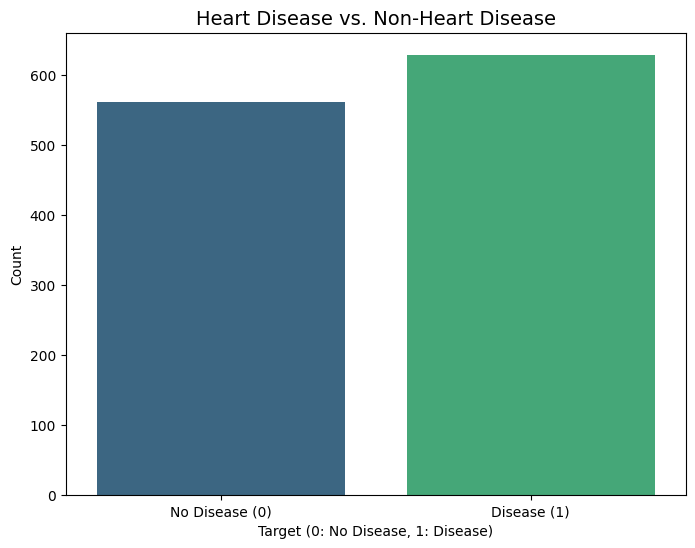

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=heart, x='target', palette='viridis')
plt.title('Heart Disease vs. Non-Heart Disease', fontsize=14)
plt.xlabel('Target (0: No Disease, 1: Disease)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease (0)', 'Disease (1)'])
plt.show()


### Handling Skewness:

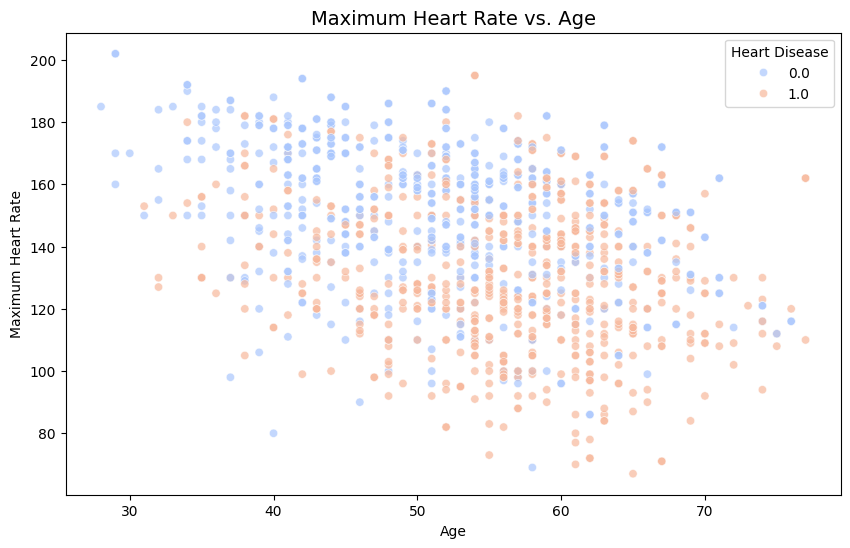

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart, x='age', y='max_heart_rate', hue='target', palette='coolwarm', alpha=0.7)
plt.title('Maximum Heart Rate vs. Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Heart Disease')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\4046294939.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=heart[heart['target'] == 0], x='age', label='No Disease (0)', shade=True, color='blue')
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\4046294939.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=heart[heart['target'] == 1], x='age', label='Disease (1)', shade=True, color='red')


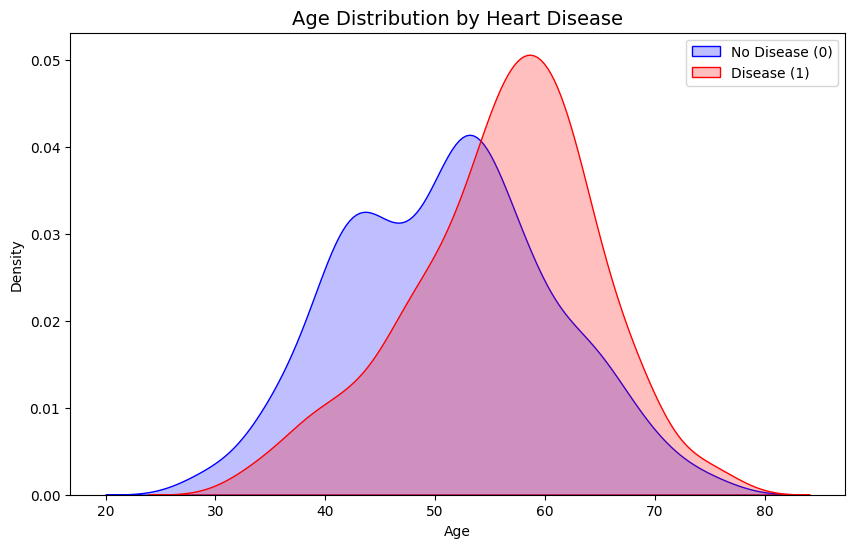

In [16]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=heart[heart['target'] == 0], x='age', label='No Disease (0)', shade=True, color='blue')
sns.kdeplot(data=heart[heart['target'] == 1], x='age', label='Disease (1)', shade=True, color='red')
plt.title('Age Distribution by Heart Disease', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()


#### As visualized, there is a higher density of heart disease above the age of 60

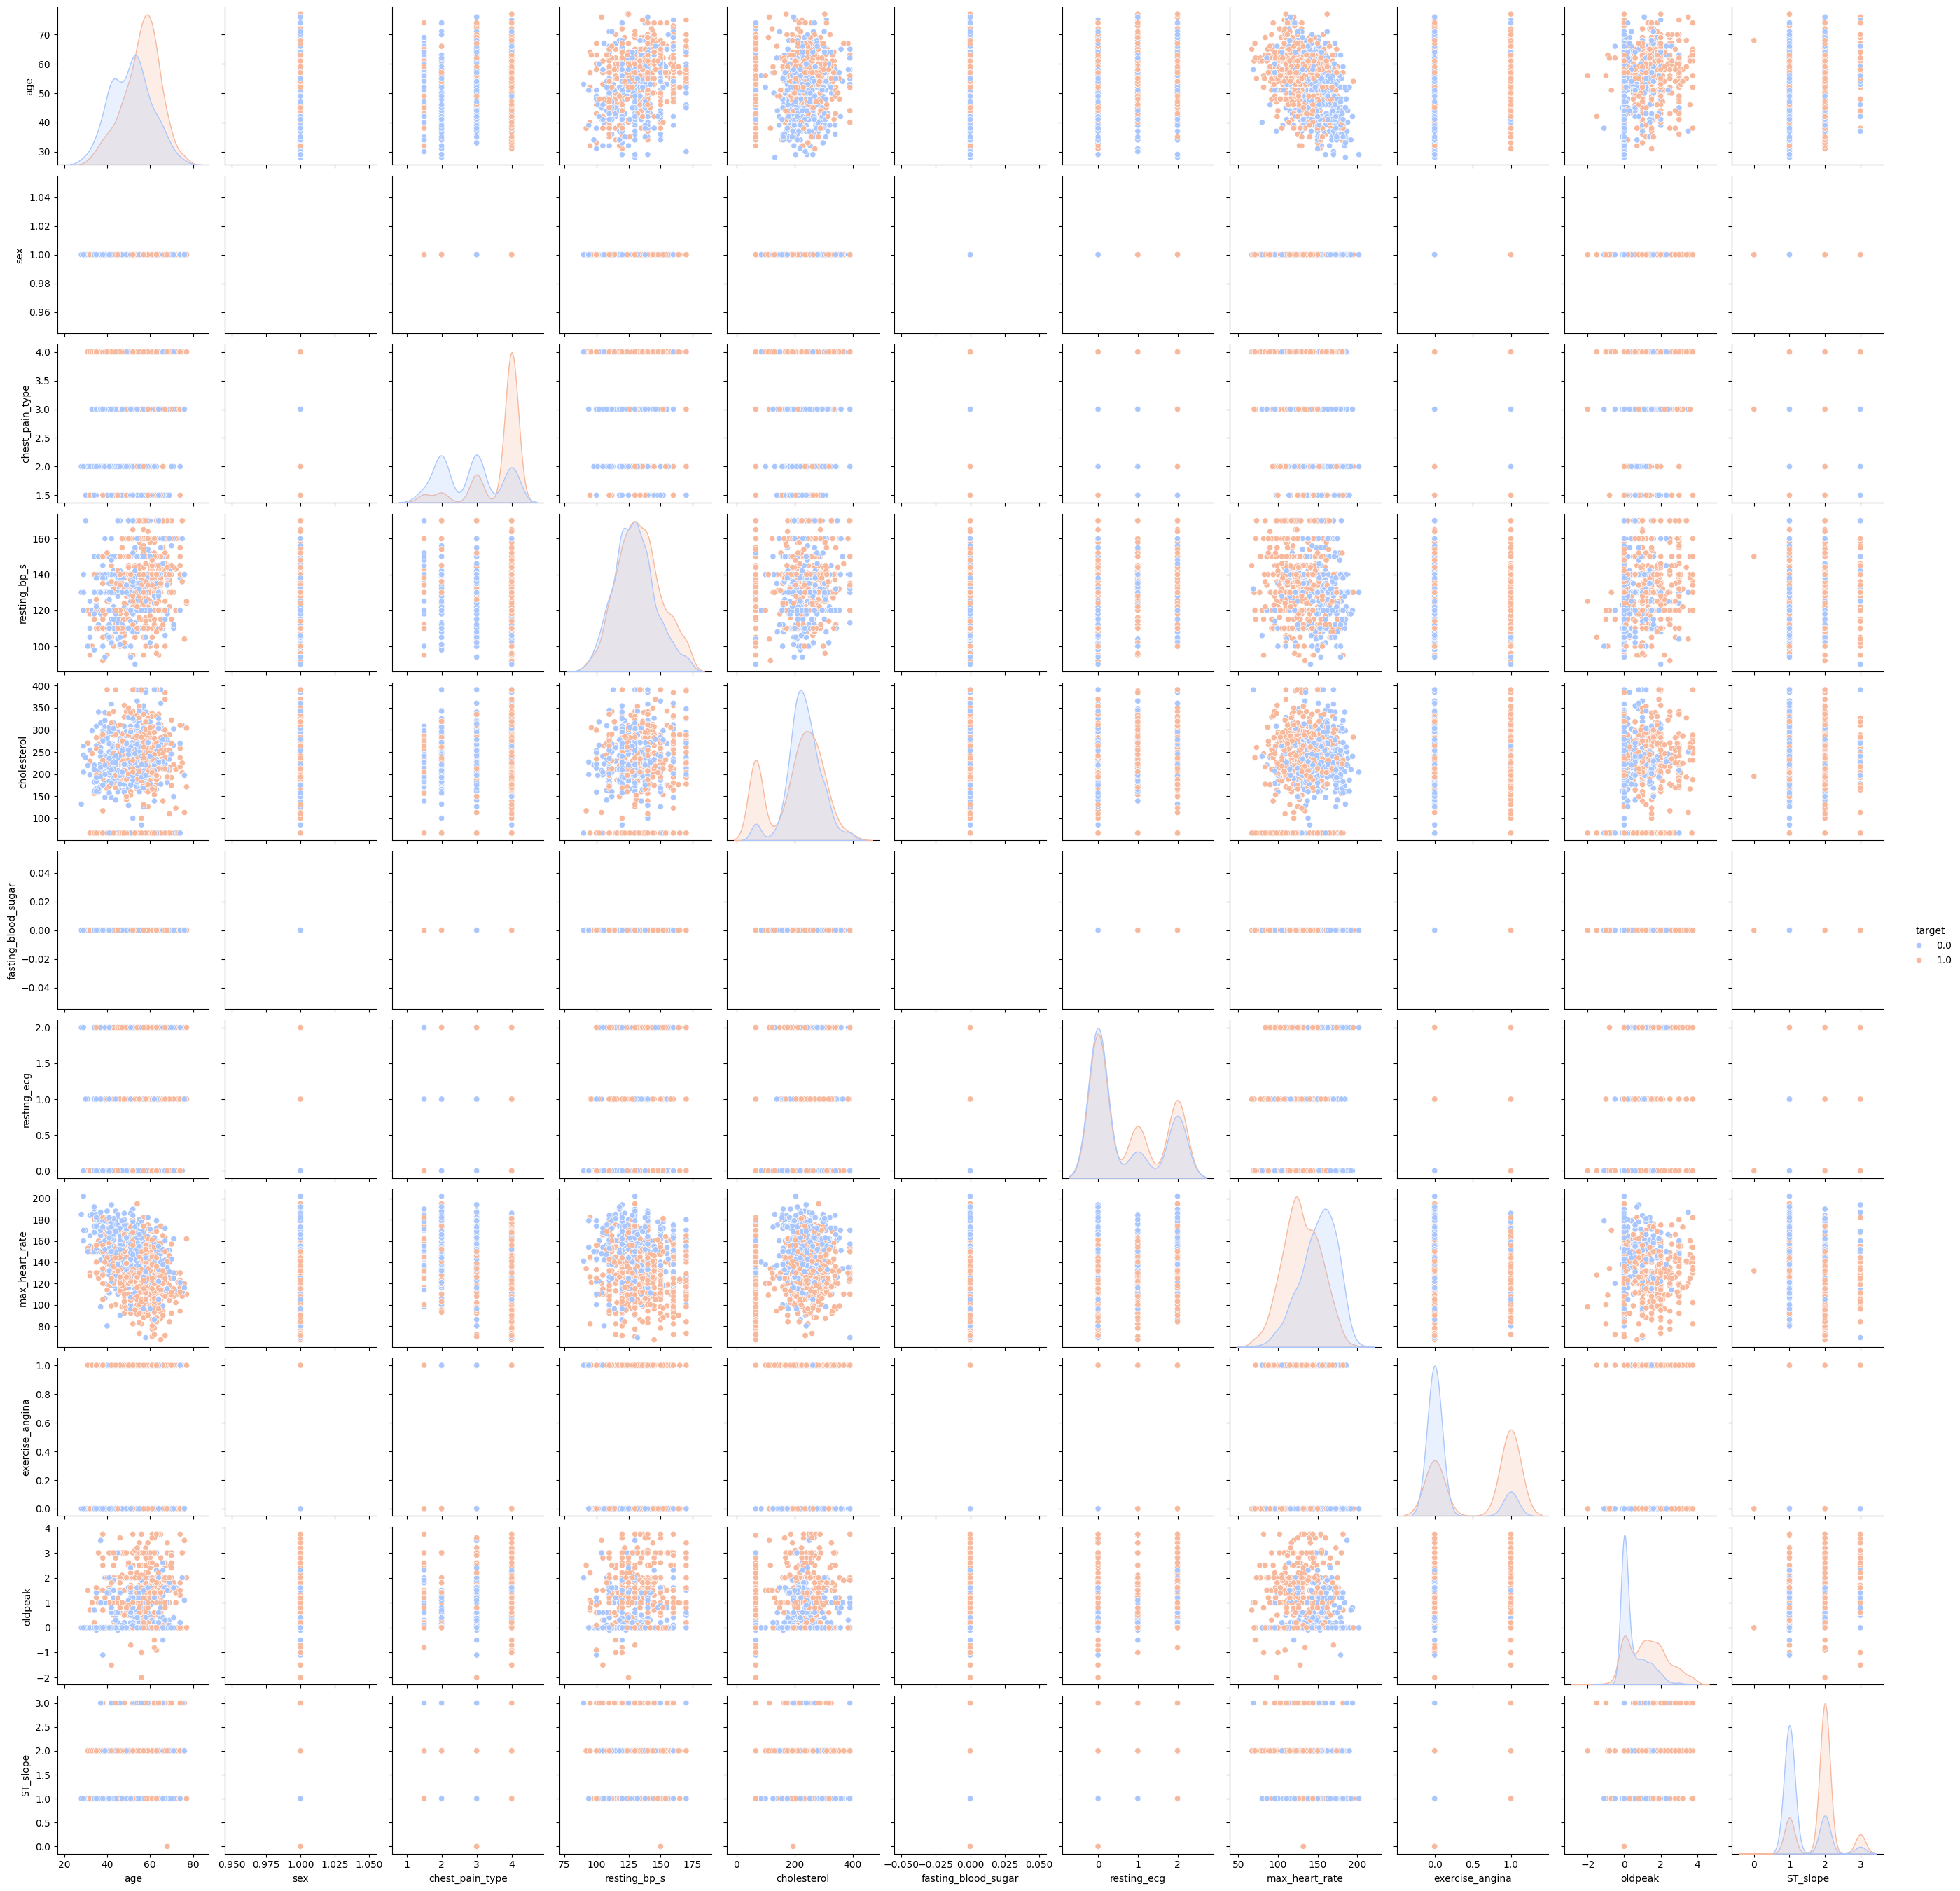

In [17]:
sns.pairplot(heart, hue='target', diag_kind='kde', palette='coolwarm')
plt.show()


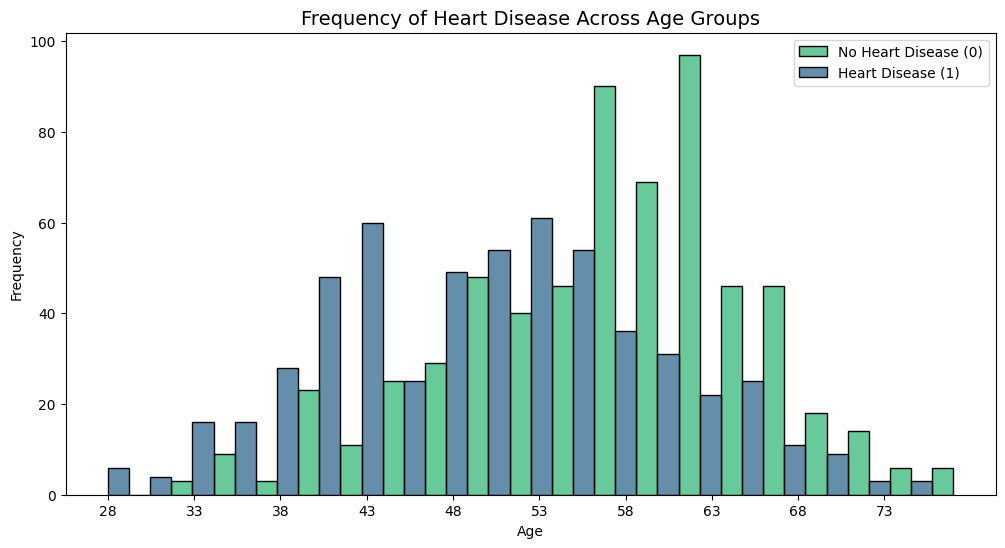

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=heart, x='age', hue='target', multiple='dodge', bins=20, kde=False, palette='viridis')
plt.title('Frequency of Heart Disease Across Age Groups', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(int(heart['age'].min()), int(heart['age'].max()) + 1, 5))  # Adjust step size as needed
plt.legend(['No Heart Disease (0)', 'Heart Disease (1)'])
plt.show()


### Handling Skewness:

C:\Users\USER\AppData\Local\Temp\ipykernel_16844\2368046316.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(heart[column].dropna())  # Drop NaN values for skew calculation


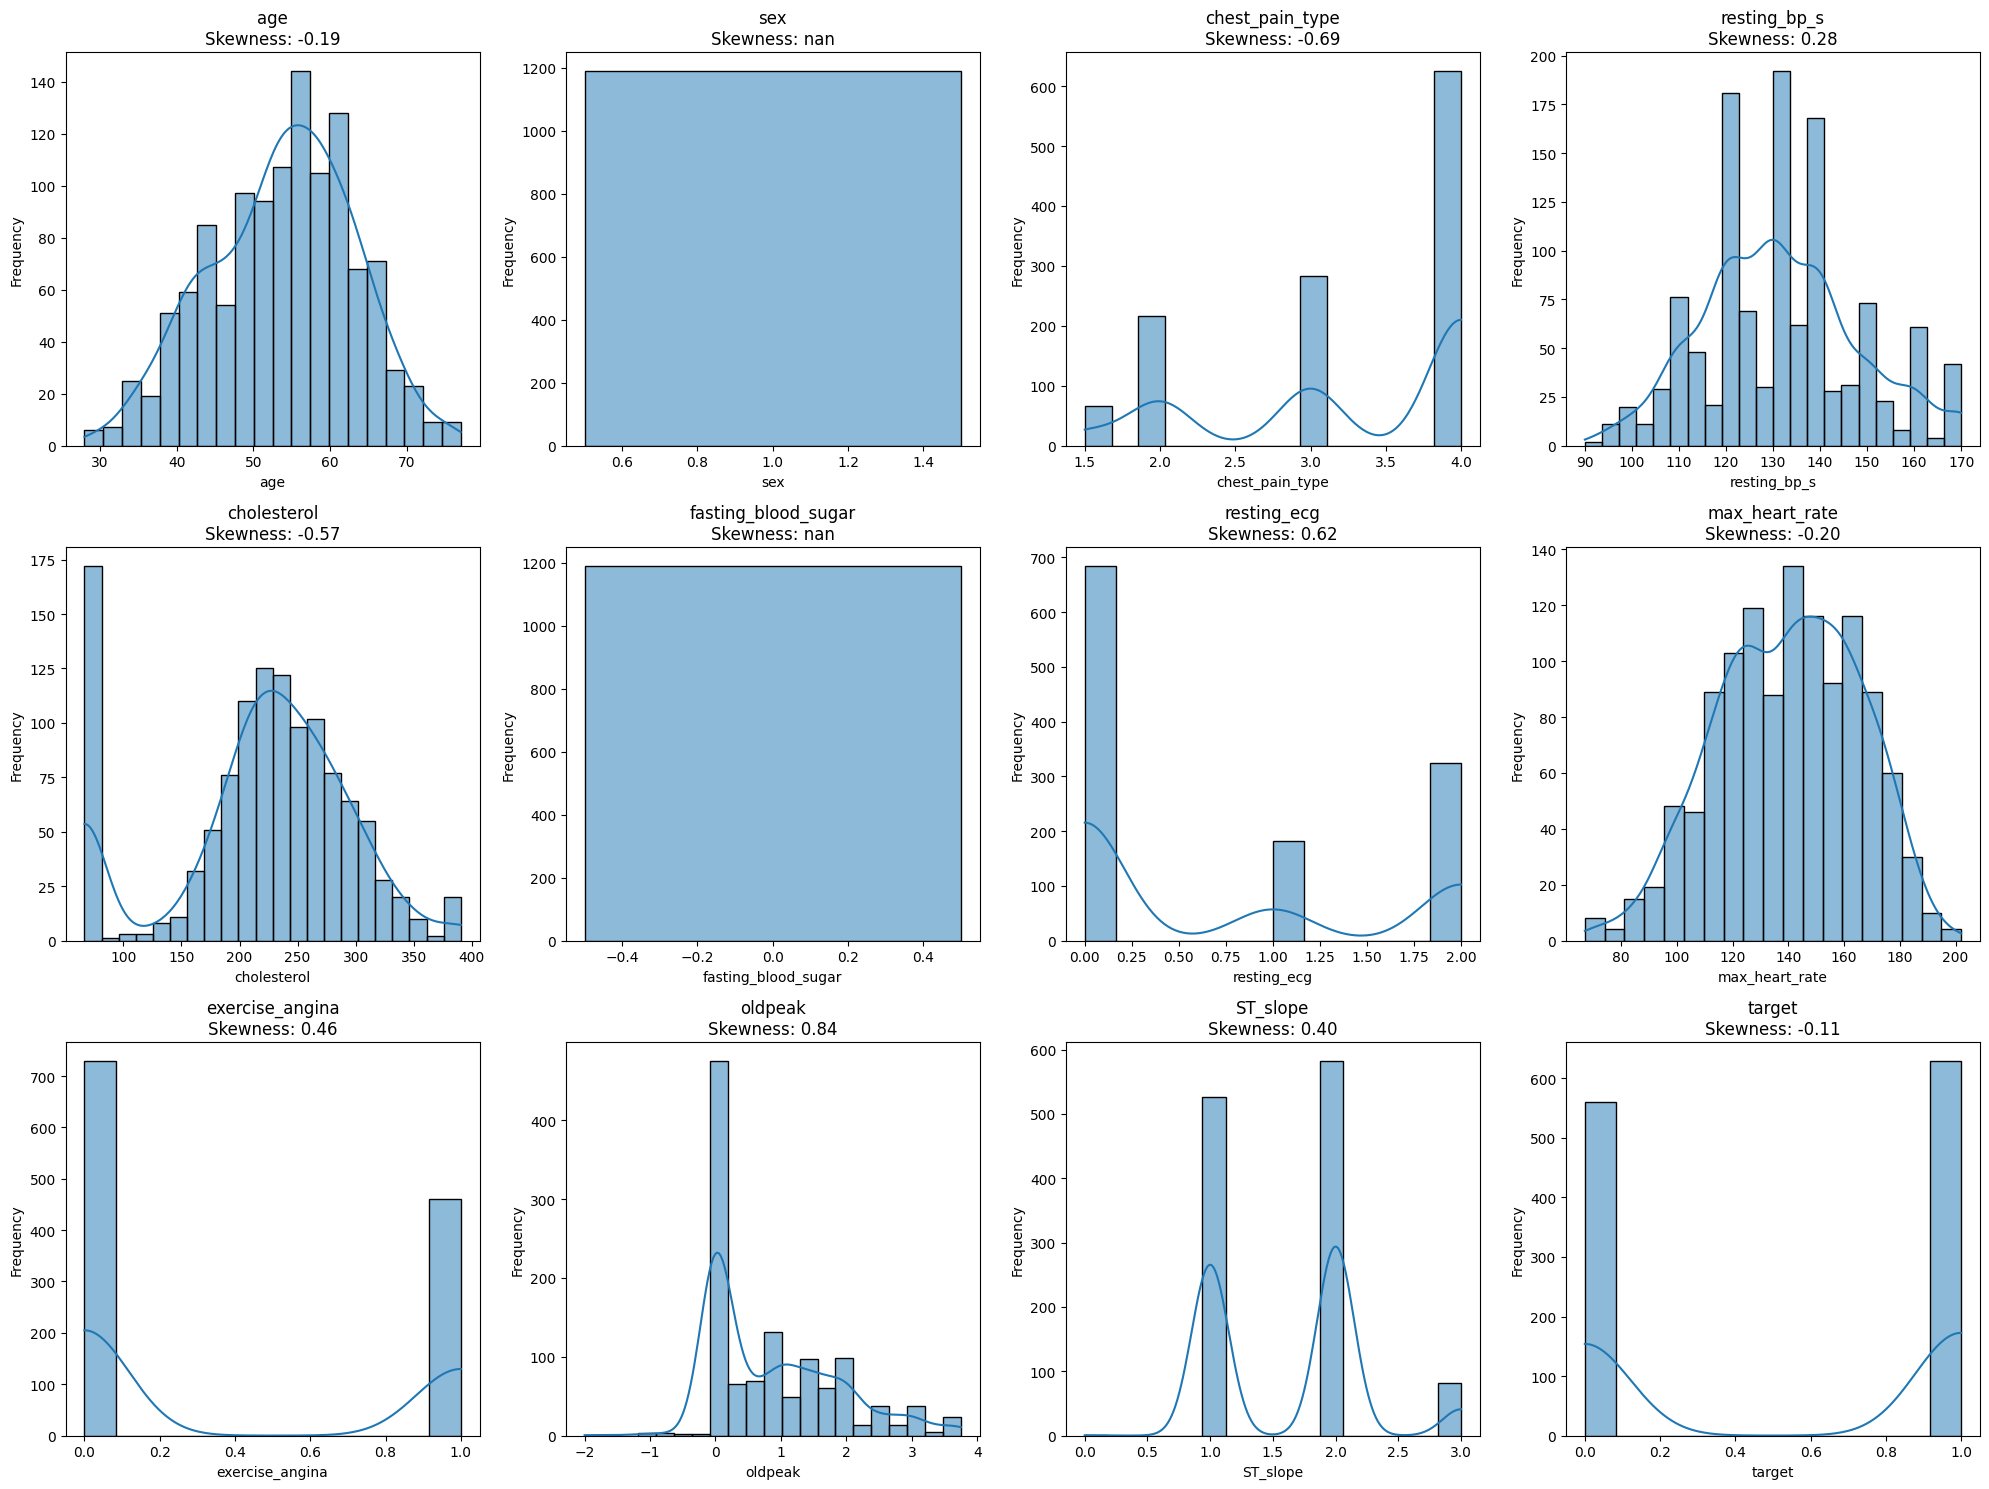

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

num_columns = 4 
num_rows = (len(heart.select_dtypes(include=['int64', 'float64']).columns) // num_columns) + \
           (1 if len(heart.select_dtypes(include=['int64', 'float64']).columns) % num_columns != 0 else 0)

fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

# Loop through columns to plot histograms
for i, column in enumerate(heart.select_dtypes(include=['int64', 'float64']).columns):
    skewness = skew(heart[column].dropna())  # Drop NaN values for skew calculation
    sns.histplot(heart[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column}\nSkewness: {skewness:.2f}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [20]:
from scipy.stats import skew
# Log transformation for Oldpeak (positive skew)
heart['oldpeak'] = heart['oldpeak'].apply(lambda x: np.log(x + 1) if x >= 0 else x)  # Add 1 to avoid log(0)
# Inverse transformation for Cholesterol (negative skew)
heart['cholesterol'] = heart['cholesterol'].apply(lambda x: 1 / (x + 1) if x != 0 else x)  # Add 1 to avoid division by 0
# Square root transformation for Resting ECG (positive skew)
heart['resting_ecg'] = heart['resting_ecg'].apply(lambda x: np.sqrt(x) if x >= 0 else x)
# Inverse transformation for Chest Pain Type (negative skew)
heart['chest_pain_type'] = heart['chest_pain_type'].apply(lambda x: 1 / (x + 1) if x != 0 else x)  # Add 1 to avoid division by 0
# Check the skewness after transformation
skewed_columns = ['oldpeak', 'cholesterol', 'resting_ecg', 'chest_pain_type']
for column in skewed_columns:
    new_skewness = skew(heart[column].dropna())
    print(f'Skewness of {column} after transformation: {new_skewness:.2f}')


Skewness of oldpeak after transformation: 0.11
Skewness of cholesterol after transformation: 1.81
Skewness of resting_ecg after transformation: 0.42
Skewness of chest_pain_type after transformation: 1.10


In [21]:
import numpy as np
from scipy.stats import skew, boxcox

if (heart['cholesterol'] <= 0).any():
    heart['cholesterol'] = heart['cholesterol'] + abs(heart['cholesterol'].min()) + 1  # Shift to positive
heart['cholesterol'], _ = boxcox(heart['cholesterol'])  # Apply Box-Cox transformation

# Inverse transformation for Chest Pain Type (negative skew)
heart['chest_pain_type'] = heart['chest_pain_type'].apply(lambda x: 1 / (x + 1) if x != 0 else x)  # Add 1 to avoid division by 0

# If the inverse transformation is not enough, apply Box-Cox (shift to positive if necessary)
if (heart['chest_pain_type'] <= 0).any():
    heart['chest_pain_type'] = heart['chest_pain_type'] + abs(heart['chest_pain_type'].min()) + 1  # Shift to positive
heart['chest_pain_type'], _ = boxcox(heart['chest_pain_type'])  # Apply Box-Cox transformation

# Check the skewness after transformation
skewed_columns = ['cholesterol', 'chest_pain_type']
for column in skewed_columns:
    new_skewness = skew(heart[column].dropna())
    print(f'Skewness of {column} after transformation: {new_skewness:.2f}')


Skewness of cholesterol after transformation: 0.17
Skewness of chest_pain_type after transformation: -0.45


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\1300040479.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(heart[column].dropna())


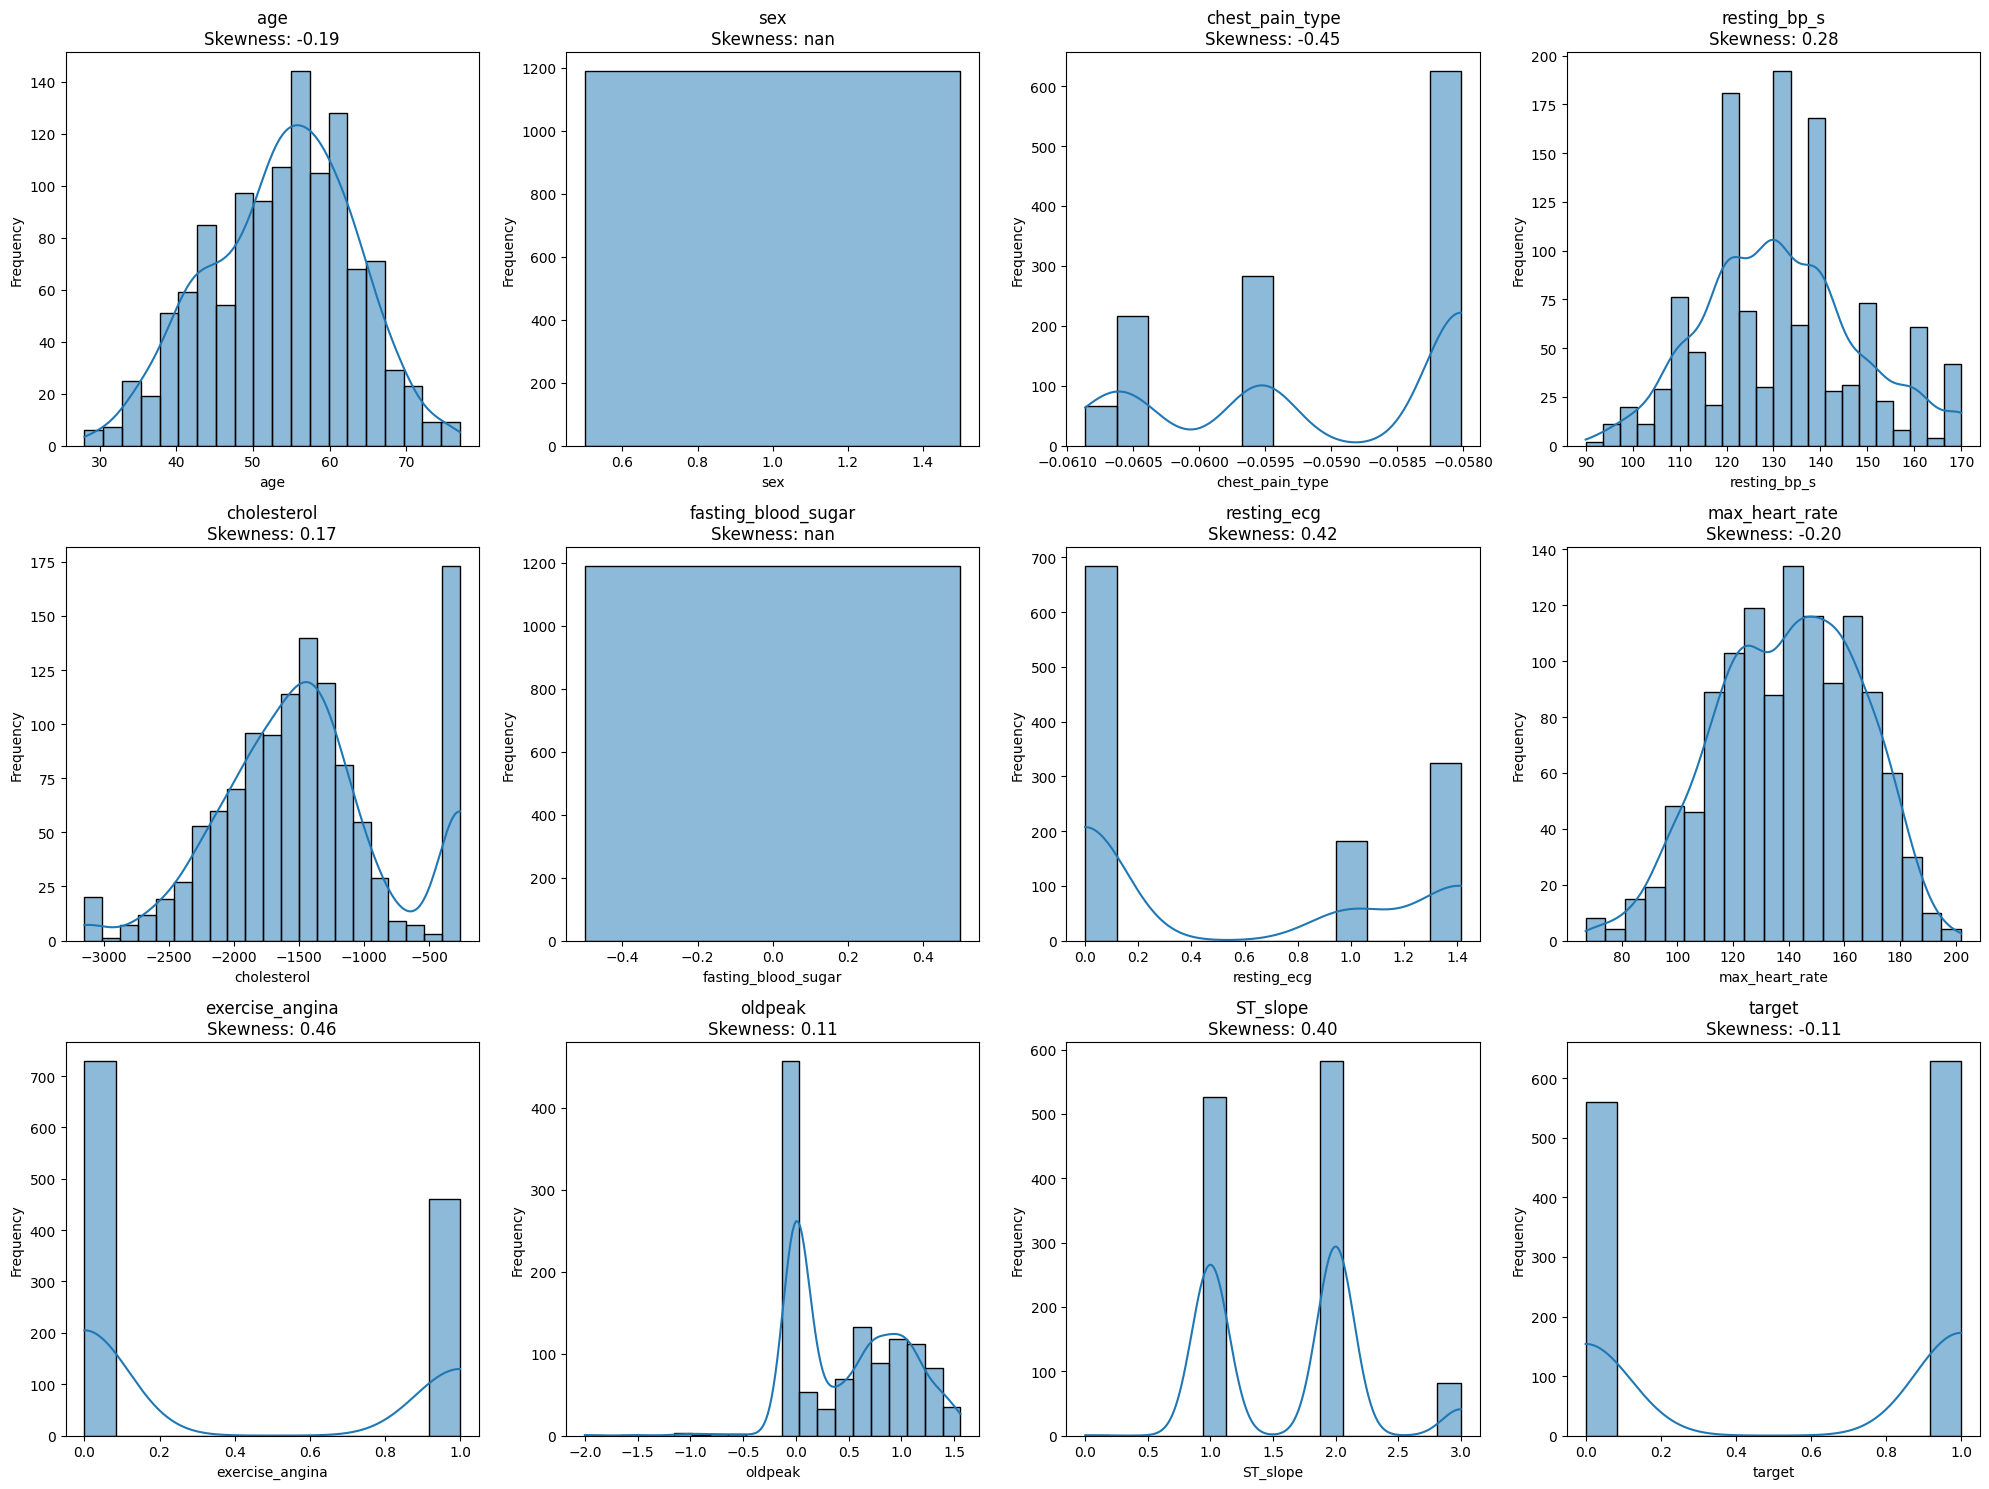

In [22]:
num_columns = 4 
num_rows = (len(heart.select_dtypes(include=['int64', 'float64']).columns) // num_columns) + \
           (1 if len(heart.select_dtypes(include=['int64', 'float64']).columns) % num_columns != 0 else 0)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 5 * num_rows))
axes = axes.flatten()  
for i, column in enumerate(heart.select_dtypes(include=['int64', 'float64']).columns):
    skewness = skew(heart[column].dropna()) 
    sns.histplot(heart[column], kde=True, ax=axes[i])
    axes[i].set_title(f'{column}\nSkewness: {skewness:.2f}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


### Heatmap and further visualization

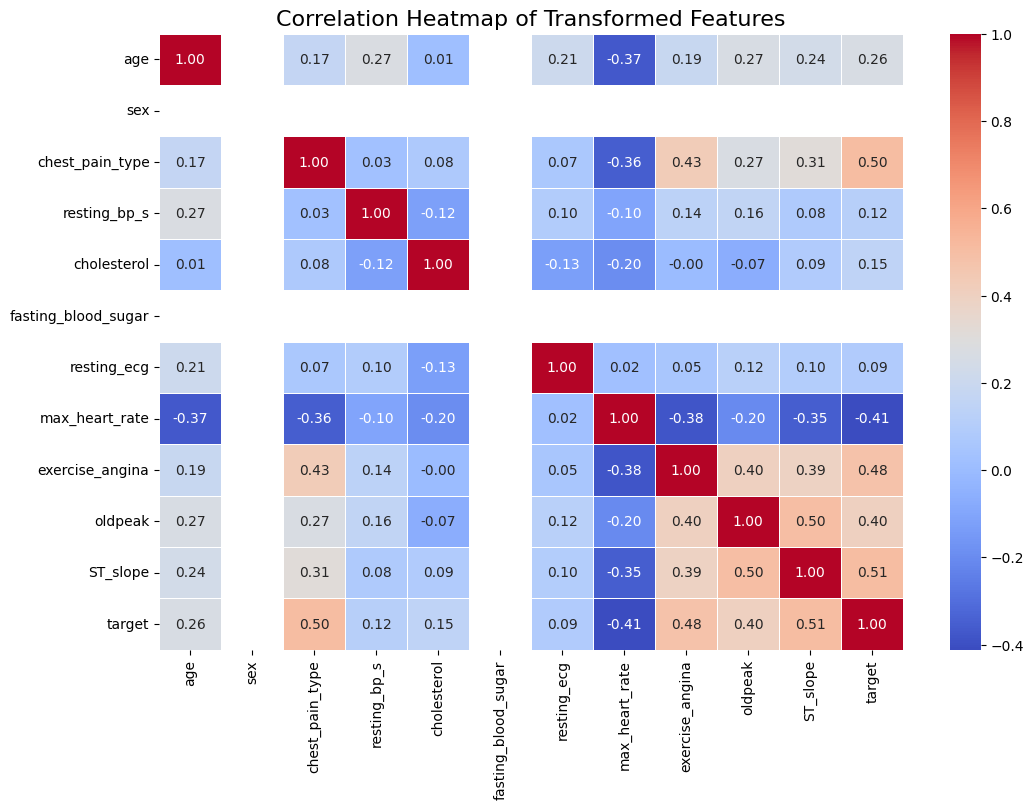

In [23]:
corr_matrix = heart.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Transformed Features', fontsize=16)
plt.show()


In [24]:
unique_values = heart['fasting_blood_sugar'].unique()
print(unique_values)


[0.]


In [25]:
missing_values = heart['fasting_blood_sugar'].isna().sum()
print(f'Missing values in fasting blood sugar column: {missing_values}')


Missing values in fasting blood sugar column: 0


#### The column: fasting blood sugar seems irrelevant since all it values are 0, however upon inspecting the documentaion of the dataset, it is encoded

#### "fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)": Information in dataset documentation

## F values

In [26]:
from sklearn.feature_selection import f_classif
# Calculate F-value for each feature
F_values, _ = f_classif(heart.drop('target', axis=1), heart['target'])
F_values_df = pd.DataFrame({'Feature': heart.drop('target', axis=1).columns, 
                               'F-value': F_values})
F_values_df = F_values_df.sort_values(by='F-value', ascending=False)
print(F_values_df)

                Feature     F-value
10             ST_slope  408.000692
2       chest_pain_type  406.281513
8       exercise_angina  358.492580
7        max_heart_rate  242.367161
9               oldpeak  225.851685
0                   age   87.580158
4           cholesterol   25.913622
3          resting_bp_s   16.345117
6           resting_ecg    9.338830
1                   sex         NaN
5   fasting_blood_sugar         NaN


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


#### ST_scope and chest pain have high F-values indicating they are likely the most important features
#### sex and fasting_blood_sugar have NaN values for F-value and p-value, which is because they are constant features

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1 5] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\3980317800.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F-value', data=F_values_df, palette='coolwarm')


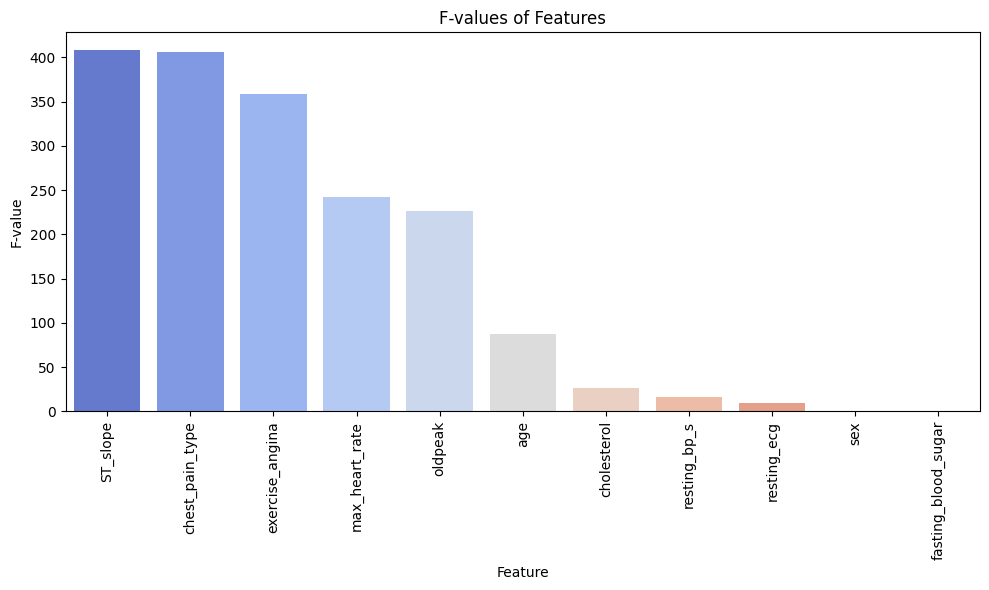

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate F-value for each feature
F_values, _ = f_classif(heart.drop('target', axis=1), heart['target'])

# Create a DataFrame with F-values
F_values_df = pd.DataFrame({'Feature': heart.drop('target', axis=1).columns, 'F-value': F_values})

# Sort the DataFrame by F-values in descending order
F_values_df = F_values_df.sort_values(by='F-value', ascending=False)

# Plot the F-values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='F-value', data=F_values_df, palette='coolwarm')
plt.title('F-values of Features')
plt.xlabel('Feature')
plt.ylabel('F-value')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot
plt.show()


## Model Training

### Train test split

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predictors = heart.drop('target', axis=1)
target_variable = heart['target']

# Split data into training and testing sets
train_predictors, test_predictors, train_target, test_target = train_test_split(predictors, target_variable, test_size=0.2, random_state=89)


### Standardization

In [29]:
scaler = StandardScaler()
# Fit and transform training data
train_predictors_scaled = scaler.fit_transform(train_predictors)
# Transform test data
test_predictors_scaled = scaler.transform(test_predictors)

### Model 1: Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(train_predictors_scaled, train_target)
# Predictions
y_pred = dt_classifier.predict(test_predictors_scaled)
# Evaluation
accuracy = accuracy_score(test_target, y_pred)
conf_matrix = confusion_matrix(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)
class_report = classification_report(test_target, y_pred)

print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Decision Tree Classifier Accuracy: 0.8782
Precision: 0.8702
Recall: 0.9048
F1-score: 0.8872
Confusion Matrix:
[[ 95  17]
 [ 12 114]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       112
         1.0       0.87      0.90      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



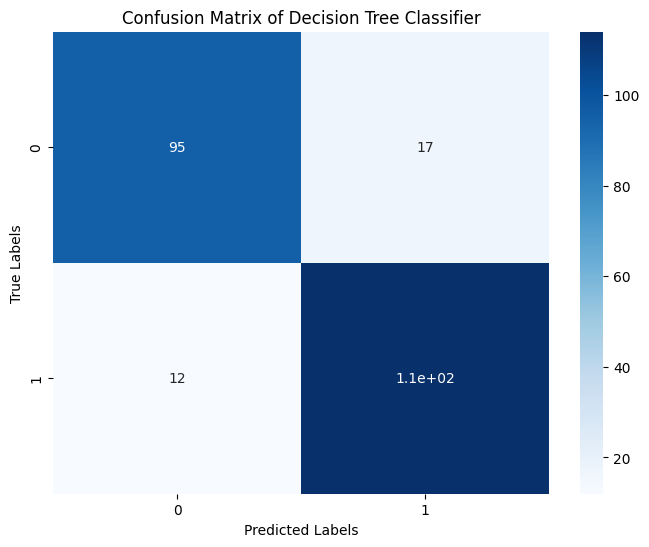

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       112
         1.0       0.87      0.90      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



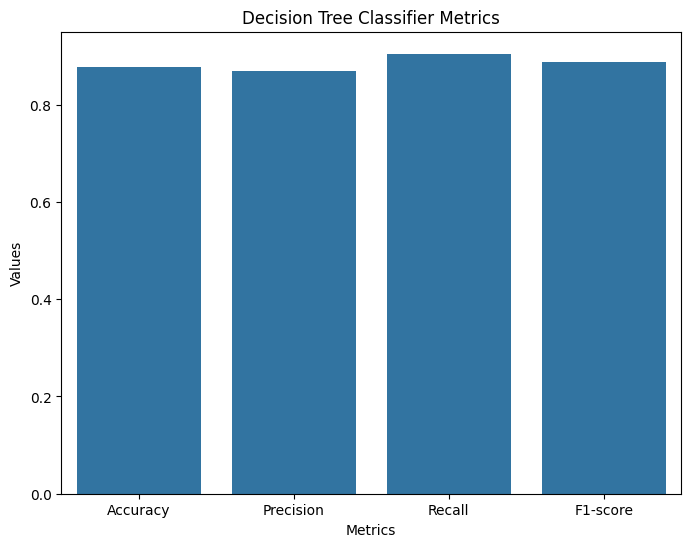

In [32]:

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

# Classification Report
print(class_report)

# Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Decision Tree Classifier Metrics')
plt.show()


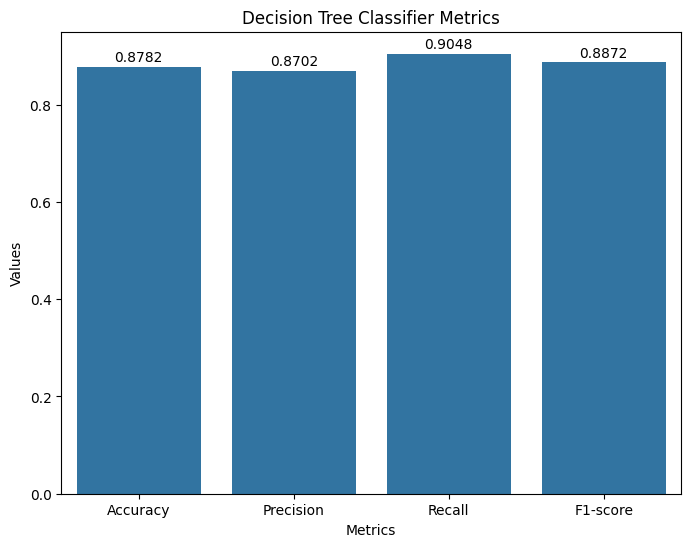

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)

# Add value labels to the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Decision Tree Classifier Metrics')
plt.show()


### Model 2: Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_predictors_scaled, train_target)
# Predictions
y_pred = rf_classifier.predict(test_predictors_scaled)
# Evaluation
accuracy = accuracy_score(test_target, y_pred)
conf_matrix = confusion_matrix(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)
class_report = classification_report(test_target, y_pred)
print(f"Random Forest Classifier Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Random Forest Classifier Accuracy: 0.9160
Precision: 0.9141
Recall: 0.9286
F1-score: 0.9213
Confusion Matrix:
[[101  11]
 [  9 117]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       112
         1.0       0.91      0.93      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



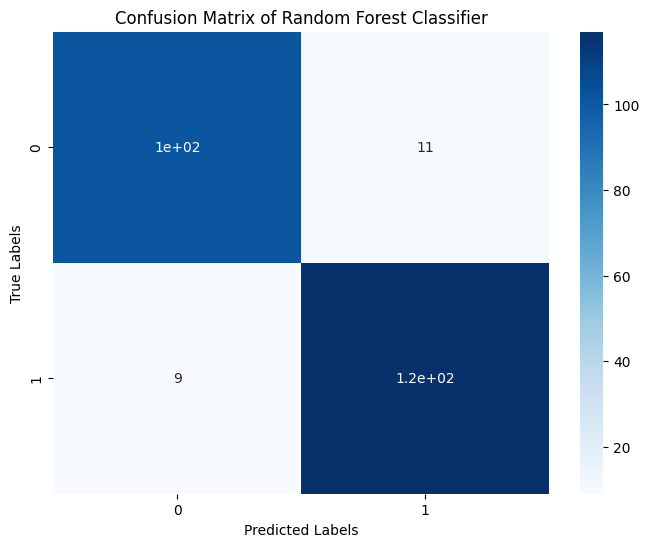

              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91       112
         1.0       0.91      0.93      0.92       126

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



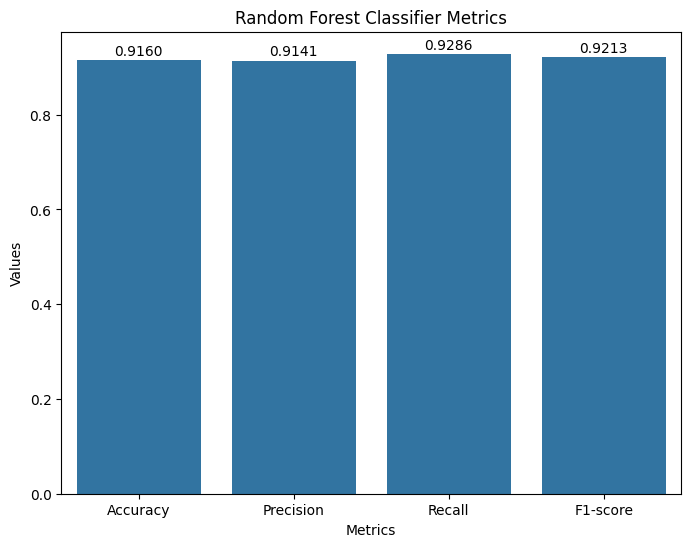

In [36]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Random Forest Classifier')
plt.show()

# Classification Report
print(class_report)

# Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)

# Add value labels to the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Random Forest Classifier Metrics')
plt.show()


### Model 3: Support Vector Classifier

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Initialize and train the Support Vector Classifier
svc_classifier = SVC(random_state=42)
svc_classifier.fit(train_predictors_scaled, train_target)
# Predictions
y_pred = svc_classifier.predict(test_predictors_scaled)
# Evaluation
accuracy = accuracy_score(test_target, y_pred)
conf_matrix = confusion_matrix(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)
class_report = classification_report(test_target, y_pred)
print(f"Support Vector Classifier Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Support Vector Classifier Accuracy: 0.8824
Precision: 0.8889
Recall: 0.8889
F1-score: 0.8889
Confusion Matrix:
[[ 98  14]
 [ 14 112]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       112
         1.0       0.89      0.89      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



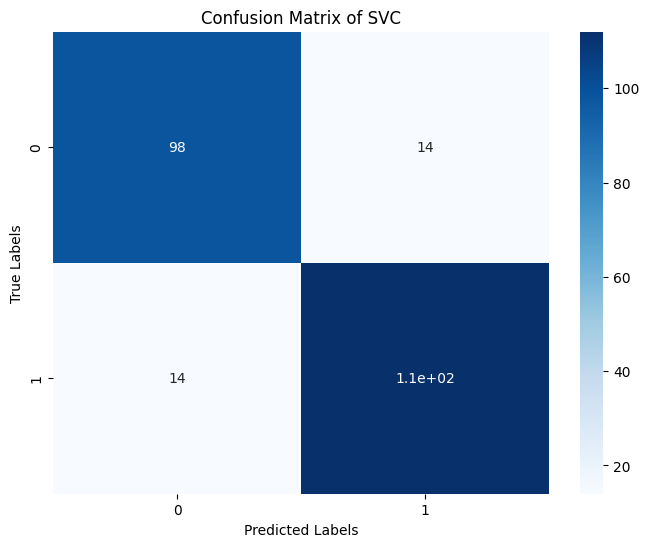

              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88       112
         1.0       0.89      0.89      0.89       126

    accuracy                           0.88       238
   macro avg       0.88      0.88      0.88       238
weighted avg       0.88      0.88      0.88       238



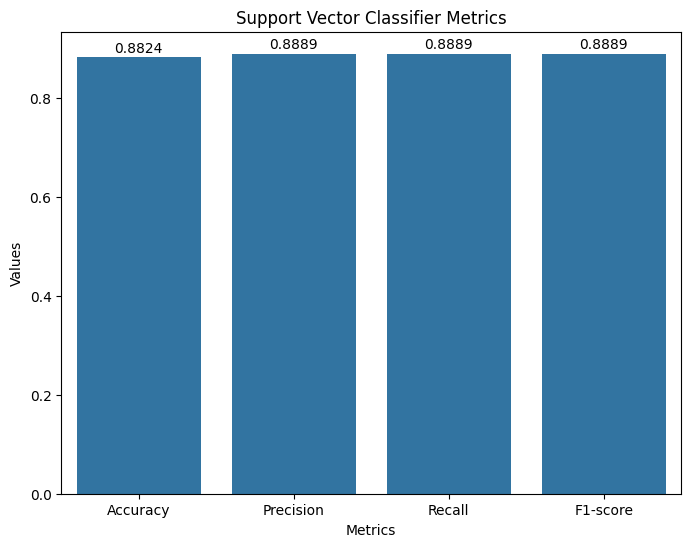

In [38]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of SVC')
plt.show()

# Classification Report
print(class_report)

# Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)

# Add value labels to the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Support Vector Classifier Metrics')
plt.show()



### Model 4: Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
# Initialize and train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(train_predictors_scaled, train_target)
# Predictions
y_pred = lr_classifier.predict(test_predictors_scaled)
# Evaluation
accuracy = accuracy_score(test_target, y_pred)
conf_matrix = confusion_matrix(test_target, y_pred)
precision = precision_score(test_target, y_pred)
recall = recall_score(test_target, y_pred)
f1 = f1_score(test_target, y_pred)
class_report = classification_report(test_target, y_pred)
print(f"Logistic Regression Classifier Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Logistic Regression Classifier Accuracy: 0.8361
Precision: 0.8480
Recall: 0.8413
F1-score: 0.8446
Confusion Matrix:
[[ 93  19]
 [ 20 106]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       112
         1.0       0.85      0.84      0.84       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



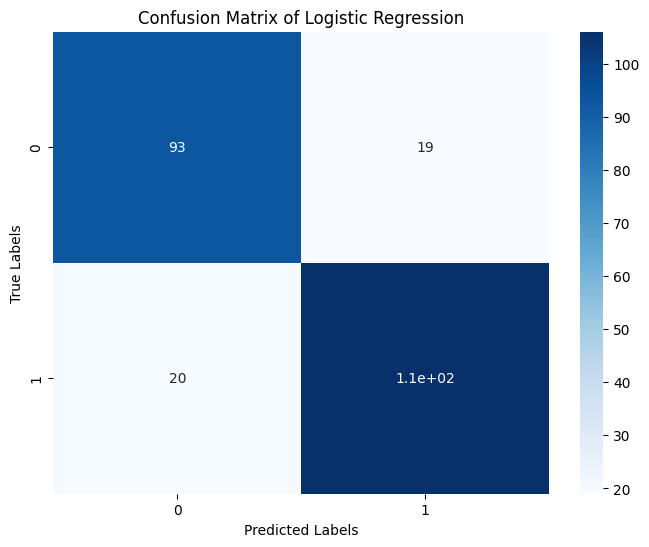

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83       112
         1.0       0.85      0.84      0.84       126

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



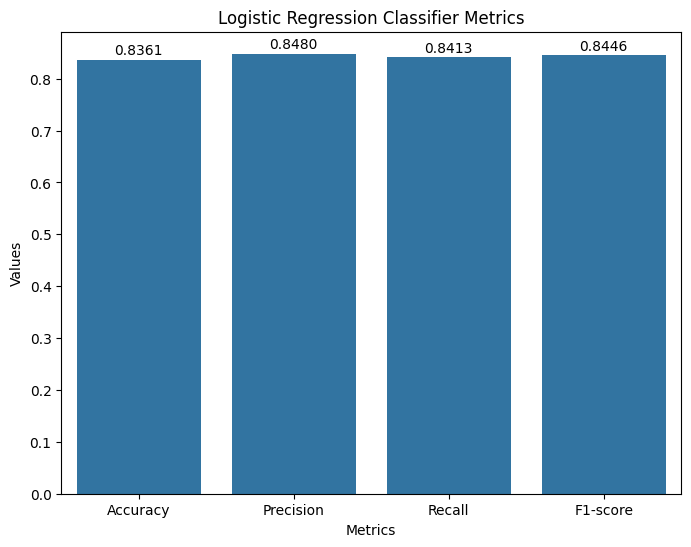

In [40]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

# Classification Report
print(class_report)

# Accuracy, Precision, Recall, F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics, y=values)

# Add value labels to the bars
for i, value in enumerate(values):
    plt.text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Logistic Regression Classifier Metrics')
plt.show()



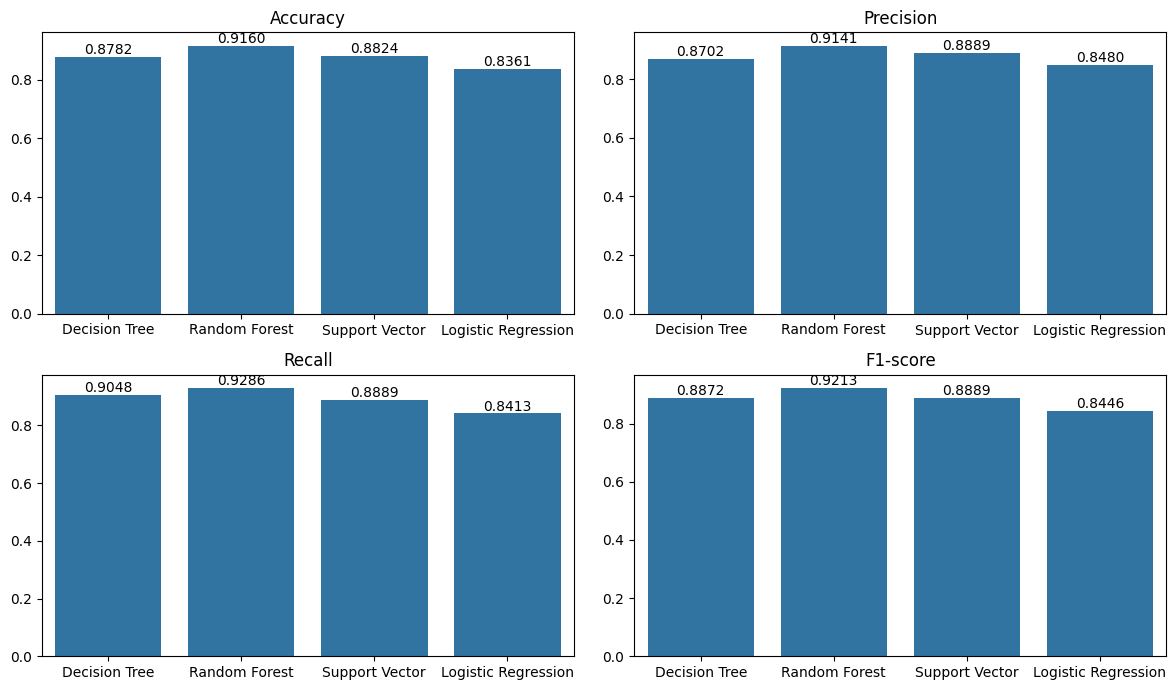

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their metrics
models = ['Decision Tree', 'Random Forest', 'Support Vector', 'Logistic Regression']
accuracies = [dt_classifier.score(test_predictors_scaled, test_target), 
               rf_classifier.score(test_predictors_scaled, test_target), 
               svc_classifier.score(test_predictors_scaled, test_target), 
               lr_classifier.score(test_predictors_scaled, test_target)]
precisions = [precision_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, lr_classifier.predict(test_predictors_scaled))]
recalls = [recall_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, lr_classifier.predict(test_predictors_scaled))]
f1_scores = [f1_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, lr_classifier.predict(test_predictors_scaled))]

# Create a bar plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

sns.barplot(x=models, y=accuracies, ax=axs[0, 0])
axs[0, 0].set_title('Accuracy')
for i, value in enumerate(accuracies):
    axs[0, 0].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=precisions, ax=axs[0, 1])
axs[0, 1].set_title('Precision')
for i, value in enumerate(precisions):
    axs[0, 1].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=recalls, ax=axs[1, 0])
axs[1, 0].set_title('Recall')
for i, value in enumerate(recalls):
    axs[1, 0].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=f1_scores, ax=axs[1, 1])
axs[1, 1].set_title('F1-score')
for i, value in enumerate(f1_scores):
    axs[1, 1].text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_16844\32049760.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, ax=axs[0, 0], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\32049760.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=precisions, ax=axs[0, 1], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_16844\32049760.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=recalls, ax=axs[1, 0], palette='coolwarm')
C:\Users\USER\AppData\Local\Temp\ipykernel_

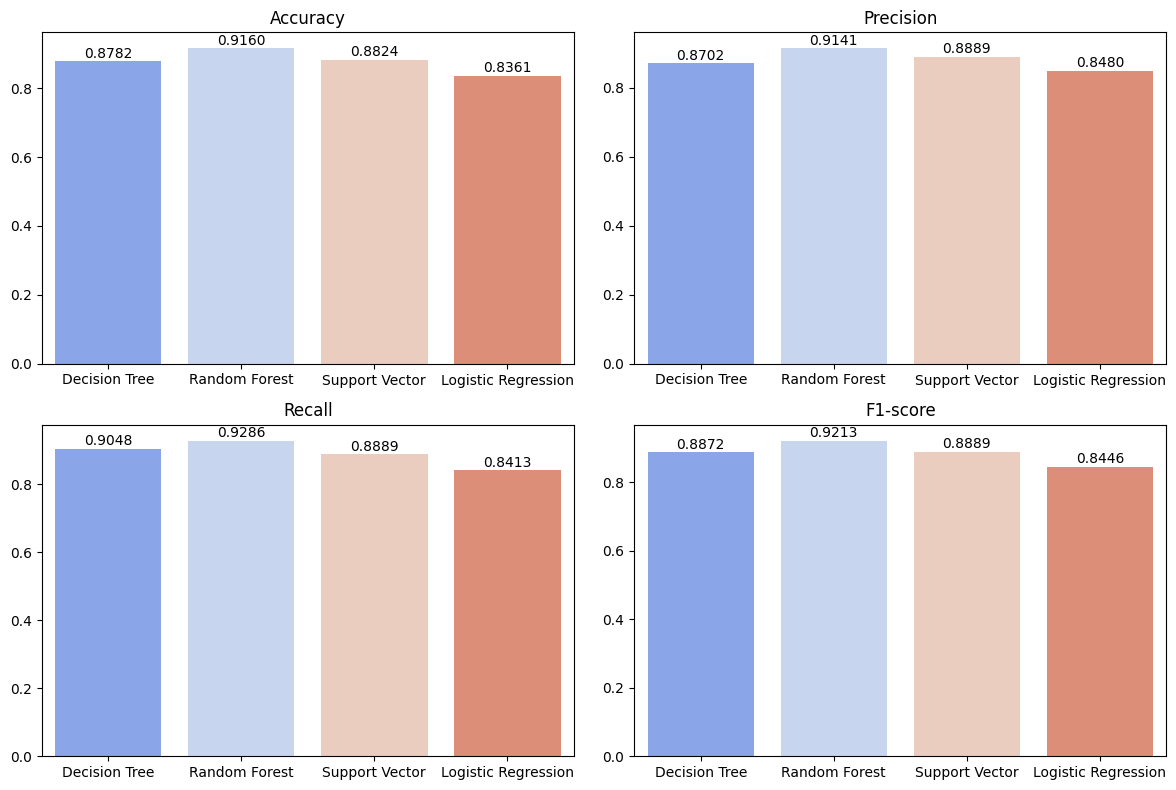

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their metrics
models = ['Decision Tree', 'Random Forest', 'Support Vector', 'Logistic Regression']
accuracies = [dt_classifier.score(test_predictors_scaled, test_target), 
               rf_classifier.score(test_predictors_scaled, test_target), 
               svc_classifier.score(test_predictors_scaled, test_target), 
               lr_classifier.score(test_predictors_scaled, test_target)]
precisions = [precision_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
               precision_score(test_target, lr_classifier.predict(test_predictors_scaled))]
recalls = [recall_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
            recall_score(test_target, lr_classifier.predict(test_predictors_scaled))]
f1_scores = [f1_score(test_target, dt_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, rf_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, svc_classifier.predict(test_predictors_scaled)), 
              f1_score(test_target, lr_classifier.predict(test_predictors_scaled))]

# Create a bar plot for each metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.barplot(x=models, y=accuracies, ax=axs[0, 0], palette='coolwarm')
axs[0, 0].set_title('Accuracy')
for i, value in enumerate(accuracies):
    axs[0, 0].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=precisions, ax=axs[0, 1], palette='coolwarm')
axs[0, 1].set_title('Precision')
for i, value in enumerate(precisions):
    axs[0, 1].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=recalls, ax=axs[1, 0], palette='coolwarm')
axs[1, 0].set_title('Recall')
for i, value in enumerate(recalls):
    axs[1, 0].text(i, value + 0.01, f"{value:.4f}", ha='center')

sns.barplot(x=models, y=f1_scores, ax=axs[1, 1], palette='coolwarm')
axs[1, 1].set_title('F1-score')
for i, value in enumerate(f1_scores):
    axs[1, 1].text(i, value + 0.01, f"{value:.4f}", ha='center')

plt.tight_layout()
plt.show()


### Based on these results, the Random Forest Classifier appears to be the best performing model, with an accuracy of 0.9160 and an F1-score of 0.9200.
